In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:
df=pd.read_csv('avengers_pre.csv')

In [ ]:
df

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak
...,...,...,...,...,...,...,...,...,...,...,...
58921,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiujykn,aminabz,wow. really just with colour pencil?,2020-02-26 18:47:14,2,wow really just with colour pencil
58922,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiuwpnr,mattwart,"Yup, the drawing was done with colour pencil (...",2020-02-26 20:40:53,2,yup the drawing be do with colour pencil prism...
58923,UnrealLuigi,'Avengers: Endgame' limited edition poster by ...,18043,https://i.redd.it/2cmyvbdx52h41.jpg,1.581760e+09,fmh8f03,blackbutterfree,"Looks to be missing Howard the Duck, Kraglin (...",2020-04-05 07:03:57,1,look to be miss howard the duck kraglin both b...
58924,gianben123,Avengers: Endgame | Tony & teenage Morgan Star...,17416,https://v.redd.it/5hhvq02eh8y31,1.573555e+09,fojdf5j,hwengiue,"First of all, Katherine Langford has nothing t...",2020-04-25 12:26:16,2,first of all katherine langford have nothing t...


In [ ]:
df['text_pre'] = df['text_pre'].astype(str)

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In this function we create the following function that return the Compound Value computed by Vader library

In [ ]:
def sentiment_analyzer_scores(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence)
    sentiment_value = sentiment_dict['compound']
    return sentiment_value

In [ ]:
df['CompoundValue'] = df['text_pre'].apply(sentiment_analyzer_scores)

In [ ]:
df.head()

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,CompoundValue
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,-0.9745
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,0.0000
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,0.7003
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,0.6705
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,0.0000


We have created three different functions for each polarity (positive, negative, neutral) which return the sentiment score rather than a compound score.

In [ ]:
def negative_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence)
    sentiment_value = sentiment_dict['neg']
    return sentiment_value

In [ ]:
df['NegativeValue'] = df['text_pre'].apply(negative_value)

In [ ]:
def positive_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence)
    sentiment_value = sentiment_dict['pos']
    return sentiment_value

In [ ]:
df['PositiveValue'] = df['text_pre'].apply(positive_value)

In [ ]:
def neutral_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence)
    sentiment_value = sentiment_dict['neu']
    return sentiment_value

In [ ]:
df['NeutralValue'] = df['text_pre'].apply(neutral_value)

In [ ]:
df.head()

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,CompoundValue,NegativeValue,PositiveValue,NeutralValue
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,-0.9745,0.328,0.065,0.607
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,0.0000,0.000,0.000,1.000
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,0.7003,0.000,0.309,0.691
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,0.6705,0.000,0.224,0.776
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,0.0000,0.000,0.000,1.000


We create a new column in our dataset that directly contained the sentiment value associated with the comment (Positive,Negative or Neutral). To do this we used the CompoundValue obtained previously and we established a specific threshold in order to convert the numerical value into the associated sentiment.

In [ ]:
def get_sentiment(value):
  if value >= 0.05:
   return("Positive")
  elif value <= - 0.05:
   return("Negative")
  else:
   return("Neutral")

In [ ]:
df["SentimentAssociated"] = df['CompoundValue'].apply(get_sentiment)

In [ ]:
df.head()

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,-0.9745,0.328,0.065,0.607,Negative
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,0.0000,0.000,0.000,1.000,Neutral
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,0.7003,0.000,0.309,0.691,Positive
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,0.6705,0.000,0.224,0.776,Positive
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,0.0000,0.000,0.000,1.000,Neutral


In [ ]:
print("The total number of negative comments is", df[df["SentimentAssociated"] == "Negative"].shape[0])
print("The total number of positive comments is", df[df["SentimentAssociated"] == "Positive"].shape[0])
print("The total number of neutral comments is", df[df["SentimentAssociated"] == "Neutral"].shape[0])

The total number of negative posts is 18630
The total number of positive posts is 29234
The total number of neutral posts is 11062


In [ ]:
total_posts = df.shape[0]

negative_posts = df[df["SentimentAssociated"] == "Negative"].shape[0]
positive_posts = df[df["SentimentAssociated"] == "Positive"].shape[0]
neutral_posts = df[df["SentimentAssociated"] == "Neutral"].shape[0]

percentage_negative = (negative_posts / total_posts) * 100
percentage_positive = (positive_posts / total_posts) * 100
percentage_neutral = (neutral_posts / total_posts) * 100

print("The percentage of negative comments is {:.2f}%".format(percentage_negative))
print("The percentage of positive comments is {:.2f}%".format(percentage_positive))
print("The percentage of neutral comments is {:.2f}%".format(percentage_neutral))

The percentage of negative posts is 31.62%
The percentage of positive posts is 49.61%
The percentage of neutral posts is 18.77%


Distribution of the SentimentAssociated column

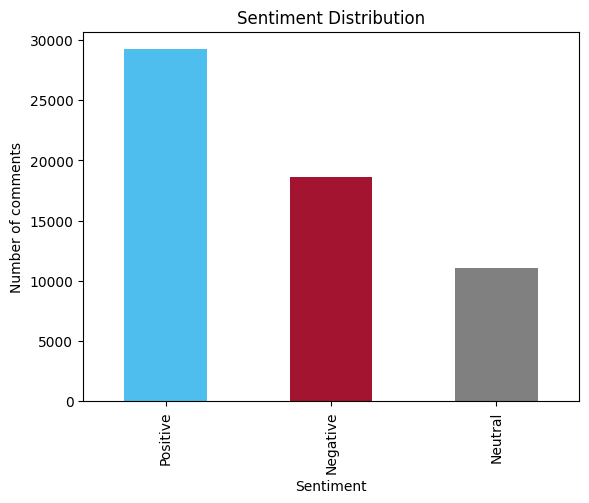

In [ ]:
sentiment_counts = df['SentimentAssociated'].value_counts()

sentiment_counts.plot(kind='bar', color=['#4DBEEE', '#A2142F', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of comments')
plt.show()

Temporal trend of sentiment using weekly resampling

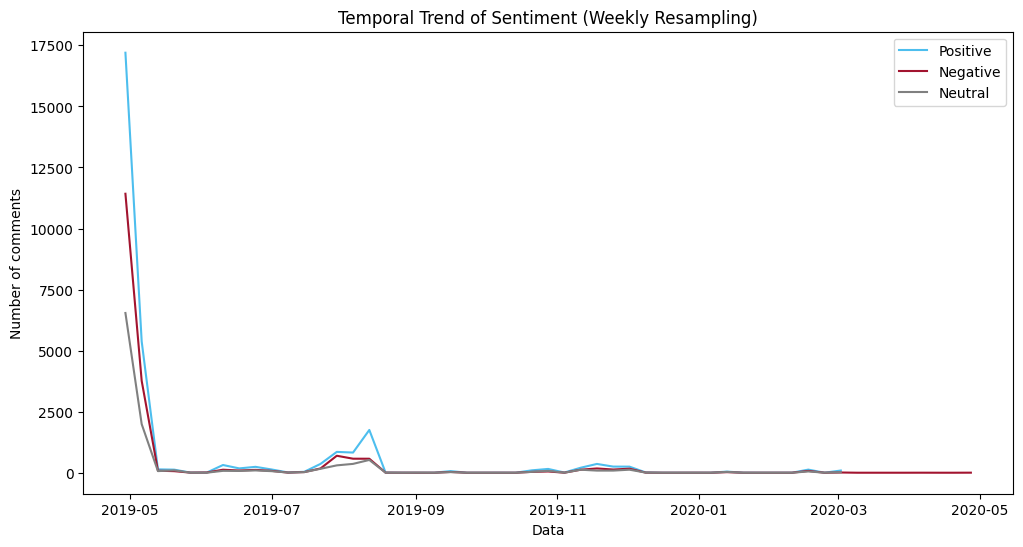

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['created_utc_comment'] = pd.to_datetime(df['created_utc_comment'])

df_positive = df[df['SentimentAssociated'] == 'Positive']
df_negative = df[df['SentimentAssociated'] == 'Negative']
df_neutral = df[df['SentimentAssociated'] == 'Neutral']

df_resampled_positive = df_positive.resample('W-Mon', on='created_utc_comment').size().reset_index(name='Number of comments')
df_resampled_negative = df_negative.resample('W-Mon', on='created_utc_comment').size().reset_index(name='Number of comments')
df_resampled_neutral = df_neutral.resample('W-Mon', on='created_utc_comment').size().reset_index(name='Number of comments')

plt.figure(figsize=(12, 6))
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_positive, label='Positive', color='#4DBEEE')
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_negative, label='Negative', color='#A2142F')
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_neutral, label='Neutral', color='gray')

plt.title('Temporal Trend of Sentiment (Weekly Resampling)')
plt.xlabel('Data')
plt.ylabel('Number of comments')
plt.legend()
plt.show()


Temporal trend of sentiment for the 1st week using daily resampling

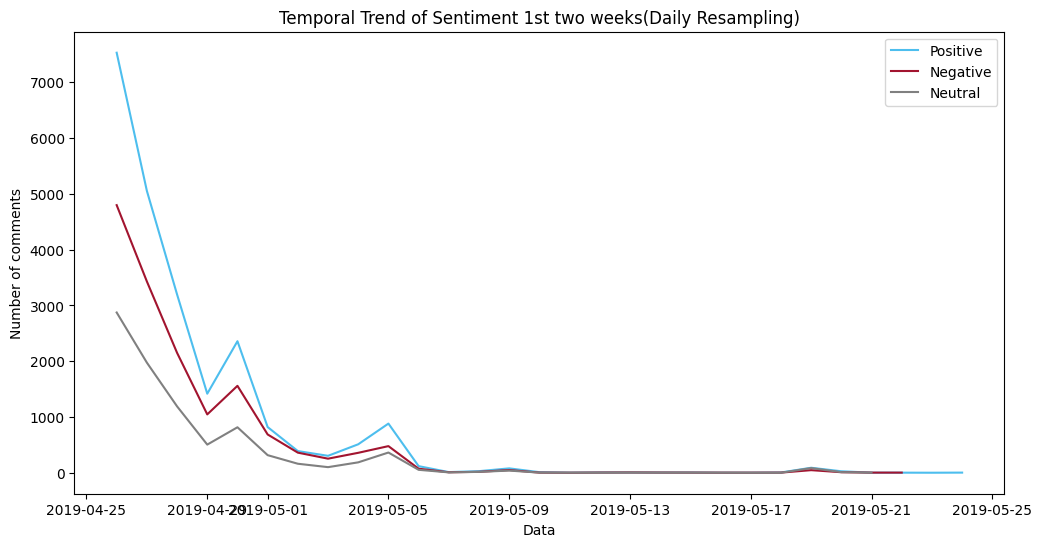

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['created_utc_comment'] = pd.to_datetime(df['created_utc_comment'])

start_date = '2019-4-26'
end_date = '2019-5-26'
filtered_df = df[(df['created_utc_comment'] >= start_date) & (df['created_utc_comment'] <= end_date)]


df_positive = filtered_df[filtered_df['SentimentAssociated'] == 'Positive']
df_negative = filtered_df[filtered_df['SentimentAssociated'] == 'Negative']
df_neutral = filtered_df[filtered_df['SentimentAssociated'] == 'Neutral']

df_resampled_positive = df_positive.resample('D', on='created_utc_comment').size().reset_index(name='Number of comments')
df_resampled_negative = df_negative.resample('D', on='created_utc_comment').size().reset_index(name='Number of comments')
df_resampled_neutral = df_neutral.resample('D', on='created_utc_comment').size().reset_index(name='Number of comments')

plt.figure(figsize=(12, 6))
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_positive, label='Positive', color='#4DBEEE')
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_negative, label='Negative', color='#A2142F')
sns.lineplot(x='created_utc_comment', y='Number of comments', data=df_resampled_neutral, label='Neutral', color='gray')

plt.title('Temporal Trend of Sentiment 1st two weeks(Daily Resampling)')
plt.xlabel('Data')
plt.ylabel('Number of comments')
plt.legend()
plt.show()


Positive and negative wordcloud

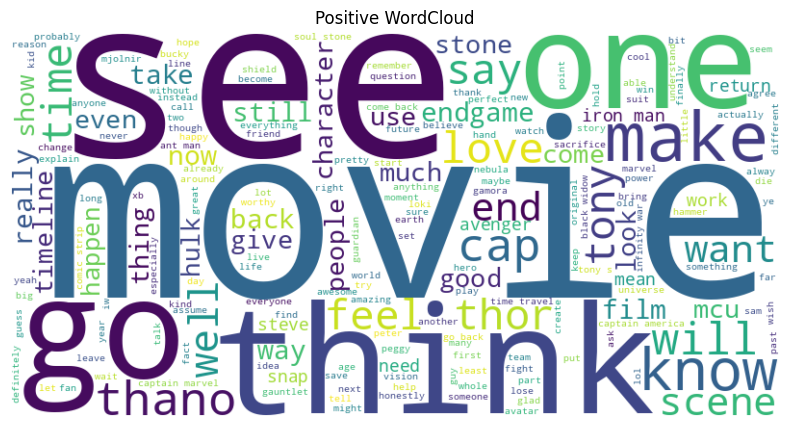

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_positive = df[df['SentimentAssociated'] == 'Positive']

positive_comments = ' '.join(df_positive['text_pre'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive WordCloud')
plt.show()


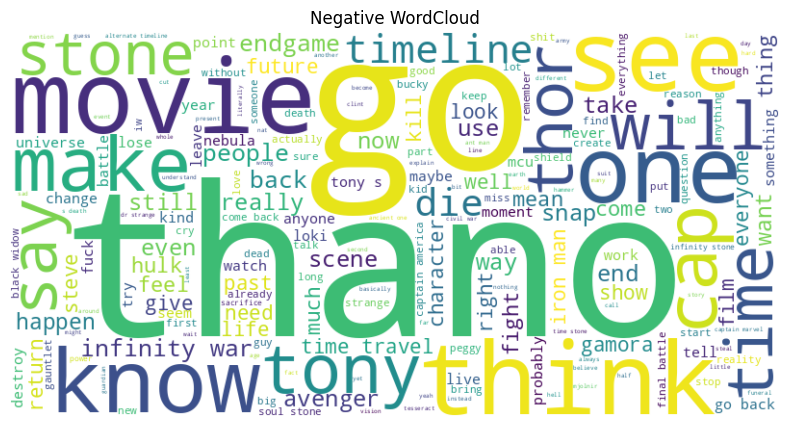

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_positive = df[df['SentimentAssociated'] == 'Negative']

positive_comments = ' '.join(df_positive['text_pre'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative WordCloud')
plt.show()


In [ ]:
df.to_csv('avengers_sentiment.csv',index=False)